# Model Implementation for Handwritten Digit Recognition

## Project Overview
This notebook implements 4 different machine learning models to classify handwritten digits (0-9):

1. Multi-layer Perceptron (MLP) - Neural Network with 2+ hidden layers
2. Logistic Regression - Multi-class classification
3. Linear Regression - One-vs-All (OvA) strategy
4. Naive Bayes - Gaussian Naive Bayes classifier

Each model will be:
- Trained on the preprocessed DIDA dataset
- Evaluated using accuracy, precision, recall, and F1-score
- Compared for performance

---
**Author:** Omar  
**Dataset:** DIDA 10k (preprocessed)

## Step 1: Import Required Libraries

Required libraries:
- NumPy: For numerical operations
- scikit-learn: For all ML models and metrics
- time: To measure training time
- matplotlib/seaborn: For visualizations

In [ ]:
# Core libraries
import numpy as np
import time
from pathlib import Path

# Machine Learning models
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.naive_bayes import GaussianNB

# Metrics and evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

✅ All libraries imported successfully!


## Step 2: Load Preprocessed Data

Load the data saved from the preprocessing notebook.

In [ ]:
# Path to processed data
DATA_PATH = Path("../data/processed")

# Load the preprocessed data
X_train = np.load(DATA_PATH / "X_train.npy")
X_test = np.load(DATA_PATH / "X_test.npy")
y_train = np.load(DATA_PATH / "y_train.npy")
y_test = np.load(DATA_PATH / "y_test.npy")

print("Data loaded successfully!")
print(f"\nDataset Shapes:")
print(f"   X_train: {X_train.shape} (samples × features)")
print(f"   X_test:  {X_test.shape}")
print(f"   y_train: {y_train.shape}")
print(f"   y_test:  {y_test.shape}")
print(f"\nClasses: {np.unique(y_train)} (digits 0-9)")

📂 Data loaded successfully!

📊 Dataset Shapes:
   • X_train: (8000, 784) (samples × features)
   • X_test:  (2000, 784)
   • y_train: (8000,)
   • y_test:  (2000,)

📈 Classes: [0 1 2 3 4 5 6 7 8 9] (digits 0-9)


## Step 3: Helper Functions

Functions to:
1. Train a model and measure time
2. Evaluate model performance
3. Display results

In [ ]:
# Dictionary to store all results for comparison
results = {}

def train_and_evaluate(model, model_name, X_train, y_train, X_test, y_test):
    """
    Train a model, measure time, and evaluate performance.
    
    Parameters:
    -----------
    model : sklearn model - The model to train
    model_name : str - Name of the model for display
    X_train, y_train : Training data
    X_test, y_test : Testing data
    
    Returns:
    --------
    dict : Dictionary containing all metrics and predictions
    """
    print(f"\n{'='*60}")
    print(f"Training: {model_name}")
    print(f"{'='*60}")
    
    # Train the model and measure time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    print(f"Training time: {training_time:.2f} seconds")
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Display results
    print(f"\nPerformance Metrics:")
    print(f"   Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")
    
    # Store results
    result = {
        'model': model,
        'model_name': model_name,
        'y_pred': y_pred,
        'training_time': training_time,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    
    # Add to global results dictionary
    results[model_name] = result
    
    return result


def plot_confusion_matrix(y_true, y_pred, model_name):
    """
    Plot a confusion matrix for the model predictions.
    """
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=range(10), yticklabels=range(10))
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.tight_layout()
    plt.show()


print("Helper functions created!")

✅ Helper functions created!


---
# Model 1: Multi-layer Perceptron (MLP) Neural Network

## What is MLP?
A Multi-layer Perceptron is a type of artificial neural network that consists of:
- Input layer: Receives the 784 pixel values
- Hidden layers: Learn patterns in the data (we'll use 2+ layers as required)
- Output layer: Produces 10 outputs (one for each digit)

## Hyperparameters:
| Parameter | Description | Our Choice |
|-----------|-------------|------------|
| `hidden_layer_sizes` | Number of neurons in each hidden layer | (256, 128) |
| `learning_rate_init` | Step size for weight updates | 0.001 |
| `max_iter` | Maximum number of epochs | 300 |
| `batch_size` | Samples per gradient update | 32 |
| `activation` | Activation function | 'relu' |
| `solver` | Optimization algorithm | 'adam' |

In [ ]:
# Create the MLP Neural Network
# Architecture: 784 (input) → 256 → 128 → 10 (output)

mlp_model = MLPClassifier(
    hidden_layer_sizes=(256, 128),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=300,
    batch_size=32,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    verbose=False
)

print("MLP Neural Network Configuration:")
print(f"   Architecture: 784 → 256 → 128 → 10")
print(f"   Hidden layers: 2")
print(f"   Activation: ReLU")
print(f"   Optimizer: Adam")
print(f"   Learning rate: 0.001")
print(f"   Max epochs: 300")
print(f"   Batch size: 32")

🧠 MLP Neural Network Configuration:
   • Architecture: 784 → 256 → 128 → 10
   • Hidden layers: 2
   • Activation: ReLU
   • Optimizer: Adam
   • Learning rate: 0.001
   • Max epochs: 300
   • Batch size: 32



🚀 Training: MLP Neural Network
⏱️ Training time: 107.29 seconds

📊 Performance Metrics:
   • Accuracy:  0.8410 (84.10%)
   • Precision: 0.8489
   • Recall:    0.8410
   • F1-Score:  0.8408


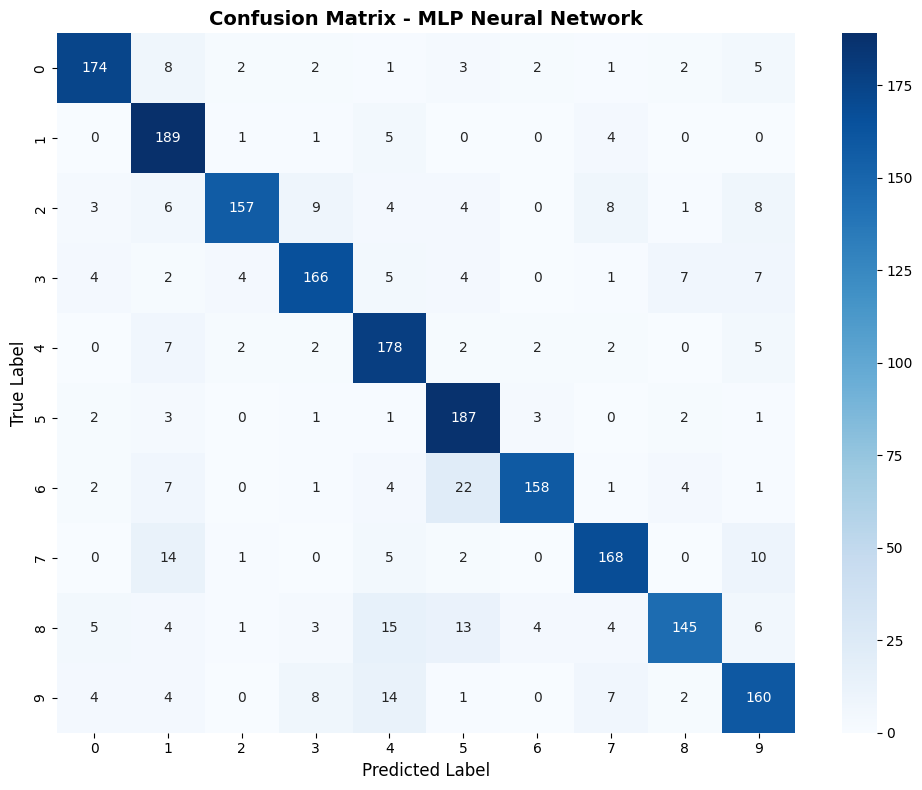

In [ ]:
# Train and evaluate the MLP model
mlp_result = train_and_evaluate(mlp_model, "MLP Neural Network", X_train, y_train, X_test, y_test)

# Show confusion matrix
plot_confusion_matrix(y_test, mlp_result['y_pred'], "MLP Neural Network")

---
# Model 2: Logistic Regression

## What is Logistic Regression?
Logistic Regression is a classification algorithm that:
- Uses the sigmoid function to predict probabilities
- Works well for linear decision boundaries
- Can be extended to multi-class using One-vs-Rest (OvR) or Multinomial

## Multi-class Setup:
For 10 classes (digits 0-9):
- multi_class='multinomial': Softmax regression (all classes at once)
- solver='lbfgs': Efficient for multi-class problems

## Parameters:
| Parameter | Description | Our Choice |
|-----------|-------------|------------|
| `max_iter` | Maximum iterations | 1000 |
| `tol` | Tolerance for stopping | 1e-4 |
| `C` | Regularization strength | 1.0 |

In [ ]:
# Create Logistic Regression model
logistic_model = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    tol=1e-4,
    C=1.0,
    random_state=42,
    verbose=0
)

print("Logistic Regression Configuration:")
print(f"   Multi-class: Multinomial (Softmax)")
print(f"   Solver: L-BFGS")
print(f"   Max iterations: 1000")
print(f"   Tolerance: 1e-4")
print(f"   Regularization (C): 1.0")

📈 Logistic Regression Configuration:
   • Multi-class: Multinomial (Softmax) - automatic with lbfgs
   • Solver: L-BFGS
   • Max iterations: 1000
   • Tolerance: 1e-4
   • Regularization (C): 1.0



🚀 Training: Logistic Regression
⏱️ Training time: 10.57 seconds

📊 Performance Metrics:
   • Accuracy:  0.7470 (74.70%)
   • Precision: 0.7468
   • Recall:    0.7470
   • F1-Score:  0.7456


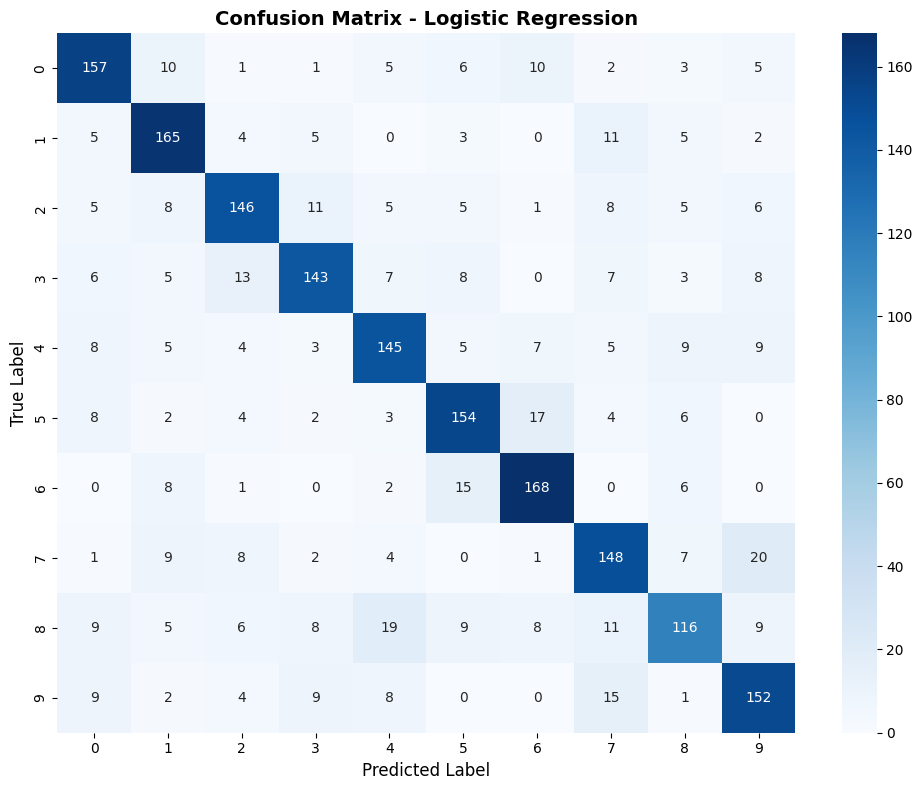

In [ ]:
# Train and evaluate Logistic Regression
logistic_result = train_and_evaluate(logistic_model, "Logistic Regression", X_train, y_train, X_test, y_test)

# Show confusion matrix
plot_confusion_matrix(y_test, logistic_result['y_pred'], "Logistic Regression")

---
# Model 3: Linear Regression with One-vs-All (OvA) Strategy

## What is One-vs-All (OvA)?
Linear Regression is designed for continuous values, not classification. To use it for multi-class classification:

1. Create 10 binary classifiers (one for each digit)
2. Each classifier predicts: "Is this digit X or not?"
3. For prediction, choose the class with the highest score

## How it works:
```
Digit 0 classifier: y = 1 if digit is 0, else y = 0
Digit 1 classifier: y = 1 if digit is 1, else y = 0
...
Digit 9 classifier: y = 1 if digit is 9, else y = 0
```

## Manual Implementation:
This is implemented manually as required by the project.

In [ ]:
class LinearRegressionOvA:
    """
    Linear Regression with One-vs-All (OvA) strategy for multi-class classification.
    
    Manual implementation as required by the project.
    
    How it works:
    1. Train 10 separate Linear Regression models (one per digit)
    2. Each model predicts a score for its respective class
    3. Final prediction = class with highest score
    """
    
    def __init__(self, alpha=1.0):
        """
        Initialize the OvA classifier.
        
        Parameters:
        -----------
        alpha : float - Regularization strength (Ridge regression)
        """
        self.alpha = alpha
        self.models = {}
        self.classes = None
    
    def fit(self, X, y):
        """
        Train the One-vs-All classifier.
        
        For each class, create a binary problem:
        - y_binary = 1 if sample belongs to this class
        - y_binary = 0 otherwise
        """
        self.classes = np.unique(y)
        
        print(f"   Training {len(self.classes)} binary classifiers...")
        
        for cls in self.classes:
            # Create binary labels
            y_binary = (y == cls).astype(int)
            
            # Train a Ridge regression model
            model = Ridge(alpha=self.alpha)
            model.fit(X, y_binary)
            
            # Store the trained model
            self.models[cls] = model
        
        return self
    
    def predict(self, X):
        """
        Predict classes for samples in X.
        
        For each sample:
        1. Get prediction scores from all 10 models
        2. Return the class with the highest score
        """
        # Get predictions from all models
        scores = np.zeros((X.shape[0], len(self.classes)))
        
        for i, cls in enumerate(self.classes):
            scores[:, i] = self.models[cls].predict(X)
        
        # Return the class with the highest score
        predictions = self.classes[np.argmax(scores, axis=1)]
        
        return predictions
    
    def predict_proba(self, X):
        """
        Get prediction scores (not true probabilities, but relative scores).
        """
        scores = np.zeros((X.shape[0], len(self.classes)))
        
        for i, cls in enumerate(self.classes):
            scores[:, i] = self.models[cls].predict(X)
        
        return scores


print("LinearRegressionOvA class created!")
print("\nManual implementation of One-vs-All strategy")
print("   Creates 10 binary classifiers (one per digit)")
print("   Uses Ridge Regression for numerical stability")
print("   Predicts by choosing class with highest score")

✅ LinearRegressionOvA class created!

📝 This is a MANUAL implementation of One-vs-All strategy
   • Creates 10 binary classifiers (one per digit)
   • Uses Ridge Regression for numerical stability
   • Predicts by choosing class with highest score


In [ ]:
# Create and train the Linear Regression OvA model
linear_ova_model = LinearRegressionOvA(alpha=1.0)

print("Linear Regression (OvA) Configuration:")
print(f"   Strategy: One-vs-All (manual implementation)")
print(f"   Base model: Ridge Regression")
print(f"   Regularization (alpha): 1.0")
print(f"   Number of classifiers: 10 (one per digit)")

📉 Linear Regression (OvA) Configuration:
   • Strategy: One-vs-All (manual implementation)
   • Base model: Ridge Regression
   • Regularization (alpha): 1.0
   • Number of classifiers: 10 (one per digit)



🚀 Training: Linear Regression (OvA)
   Training 10 binary classifiers...
⏱️ Training time: 0.67 seconds

📊 Performance Metrics:
   • Accuracy:  0.6885 (68.85%)
   • Precision: 0.6886
   • Recall:    0.6885
   • F1-Score:  0.6866


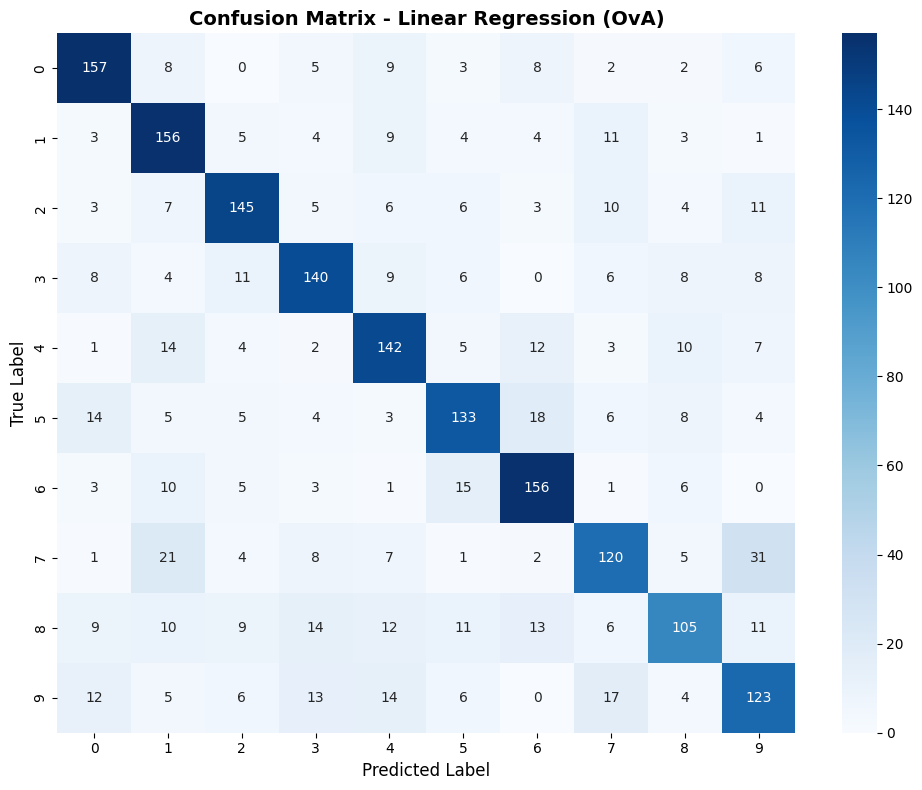

In [ ]:
# Train and evaluate Linear Regression OvA
linear_result = train_and_evaluate(linear_ova_model, "Linear Regression (OvA)", X_train, y_train, X_test, y_test)

# Show confusion matrix
plot_confusion_matrix(y_test, linear_result['y_pred'], "Linear Regression (OvA)")

---
# Model 4: Naive Bayes Classifier (GaussianNB)

## What is Naive Bayes?
Naive Bayes is a probabilistic classifier based on Bayes' Theorem:

$$P(class|features) = \frac{P(features|class) \times P(class)}{P(features)}$$

## Why "Naive"?
It assumes all features are independent of each other (which is "naive" but works surprisingly well)

## GaussianNB:
- Assumes features follow a Gaussian (normal) distribution
- Very fast to train
- Works well with high-dimensional data
- No hyperparameters to tune

In [ ]:
# Create Naive Bayes classifier
naive_bayes_model = GaussianNB()

print("Naive Bayes (GaussianNB) Configuration:")
print(f"   Type: Gaussian Naive Bayes")
print(f"   Assumption: Features follow Gaussian distribution")
print(f"   Hyperparameters: None (uses default priors)")

🎲 Naive Bayes (GaussianNB) Configuration:
   • Type: Gaussian Naive Bayes
   • Assumption: Features follow Gaussian distribution
   • Hyperparameters: None (uses default priors)



🚀 Training: Naive Bayes (GaussianNB)
⏱️ Training time: 0.05 seconds

📊 Performance Metrics:
   • Accuracy:  0.5140 (51.40%)
   • Precision: 0.5426
   • Recall:    0.5140
   • F1-Score:  0.5165


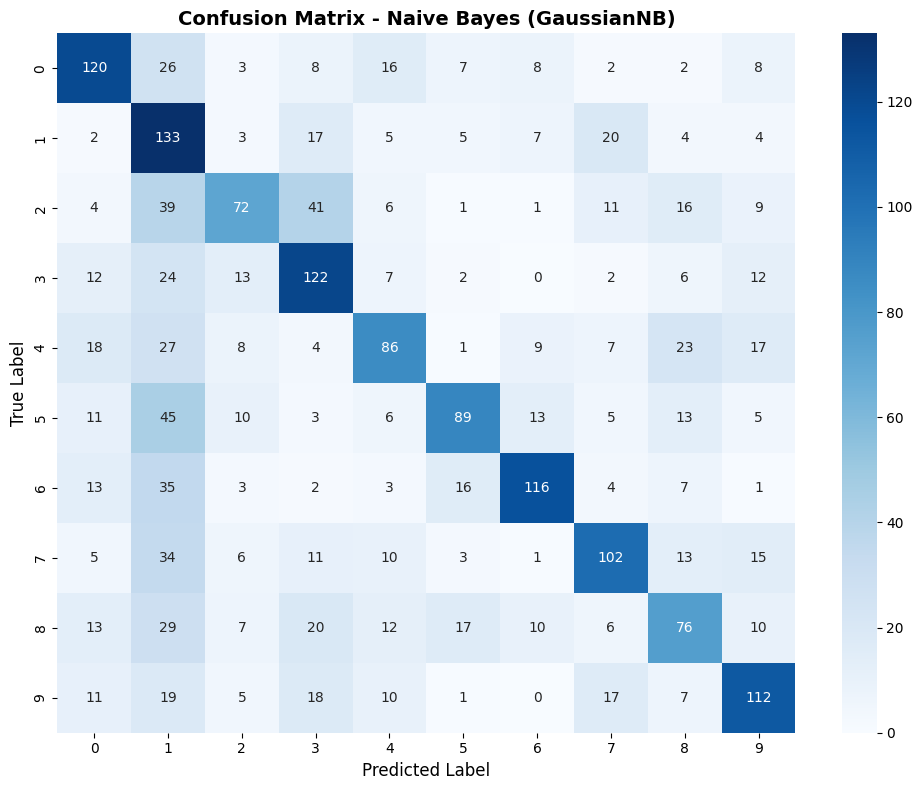

In [ ]:
# Train and evaluate Naive Bayes
nb_result = train_and_evaluate(naive_bayes_model, "Naive Bayes (GaussianNB)", X_train, y_train, X_test, y_test)

# Show confusion matrix
plot_confusion_matrix(y_test, nb_result['y_pred'], "Naive Bayes (GaussianNB)")

---
# Model Comparison

Compare all 4 models side by side.

In [ ]:
# Create comparison table
print("=" * 80)
print("MODEL COMPARISON SUMMARY")
print("=" * 80)

# Create comparison table
print(f"\n{'Model':<25} {'Accuracy':>10} {'Precision':>10} {'Recall':>10} {'F1-Score':>10} {'Time (s)':>10}")
print("-" * 80)

for name, res in results.items():
    print(f"{name:<25} {res['accuracy']:>10.4f} {res['precision']:>10.4f} {res['recall']:>10.4f} {res['f1_score']:>10.4f} {res['training_time']:>10.2f}")

print("-" * 80)

# Find best model
best_model = max(results.items(), key=lambda x: x[1]['accuracy'])
fastest_model = min(results.items(), key=lambda x: x[1]['training_time'])

print(f"\nBest Accuracy: {best_model[0]} ({best_model[1]['accuracy']*100:.2f}%)")
print(f"Fastest Training: {fastest_model[0]} ({fastest_model[1]['training_time']:.2f}s)")

📊 MODEL COMPARISON SUMMARY

Model                       Accuracy  Precision     Recall   F1-Score   Time (s)
--------------------------------------------------------------------------------
MLP Neural Network            0.8410     0.8489     0.8410     0.8408     107.29
Logistic Regression           0.7470     0.7468     0.7470     0.7456      10.57
Linear Regression (OvA)       0.6885     0.6886     0.6885     0.6866       0.67
Naive Bayes (GaussianNB)      0.5140     0.5426     0.5140     0.5165       0.05
--------------------------------------------------------------------------------

🏆 Best Accuracy: MLP Neural Network (84.10%)
⚡ Fastest Training: Naive Bayes (GaussianNB) (0.05s)


## Visualization: Performance Comparison

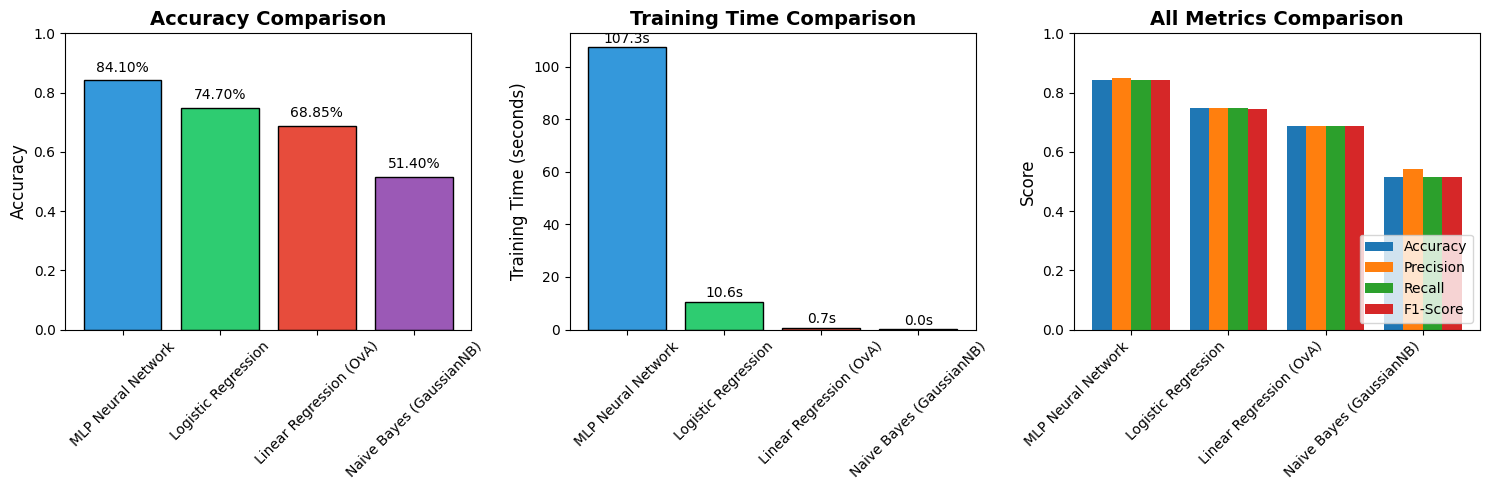

In [ ]:
# Create visualization comparing all models
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

model_names = list(results.keys())
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']

# Plot 1: Accuracy Comparison
accuracies = [results[name]['accuracy'] for name in model_names]
bars1 = axes[0].bar(model_names, accuracies, color=colors, edgecolor='black')
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='x', rotation=45)
for bar, acc in zip(bars1, accuracies):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                 f'{acc:.2%}', ha='center', va='bottom', fontsize=10)

# Plot 2: Training Time Comparison
times = [results[name]['training_time'] for name in model_names]
bars2 = axes[1].bar(model_names, times, color=colors, edgecolor='black')
axes[1].set_ylabel('Training Time (seconds)', fontsize=12)
axes[1].set_title('Training Time Comparison', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
for bar, t in zip(bars2, times):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 f'{t:.1f}s', ha='center', va='bottom', fontsize=10)

# Plot 3: All Metrics Comparison
x = np.arange(len(model_names))
width = 0.2
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, (metric, label) in enumerate(zip(metrics, metric_labels)):
    values = [results[name][metric] for name in model_names]
    axes[2].bar(x + i*width, values, width, label=label)

axes[2].set_ylabel('Score', fontsize=12)
axes[2].set_title('All Metrics Comparison', fontsize=14, fontweight='bold')
axes[2].set_xticks(x + width * 1.5)
axes[2].set_xticklabels(model_names, rotation=45, ha='right')
axes[2].legend(loc='lower right')
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

## Save Results for Later Use

Save the trained models and results for use in the validation notebook.

In [ ]:
import pickle

# Create models directory if it doesn't exist
models_path = Path("../models")
models_path.mkdir(parents=True, exist_ok=True)

# Save all trained models
models_to_save = {
    'mlp': mlp_model,
    'logistic_regression': logistic_model,
    'linear_regression_ova': linear_ova_model,
    'naive_bayes': naive_bayes_model
}

for name, model in models_to_save.items():
    with open(models_path / f"{name}_model.pkl", 'wb') as f:
        pickle.dump(model, f)

# Save results summary
with open(models_path / "training_results.pkl", 'wb') as f:
    pickle.dump(results, f)

print("Models and results saved successfully!")
print(f"\nSaved to: {models_path.resolve()}")
for name in models_to_save.keys():
    print(f"   {name}_model.pkl")
print(f"   training_results.pkl")

💾 Models and results saved successfully!

📁 Saved to: D:\ML Project\models
   • mlp_model.pkl
   • logistic_regression_model.pkl
   • linear_regression_ova_model.pkl
   • naive_bayes_model.pkl
   • training_results.pkl


---
# Summary

## Implemented Models:

| Model | Description | Key Features |
|-------|-------------|--------------|
| MLP Neural Network | Deep learning with 2 hidden layers | 256→128 neurons, ReLU, Adam optimizer |
| Logistic Regression | Multi-class softmax classification | Multinomial, L-BFGS solver |
| Linear Regression (OvA) | Manual One-vs-All implementation | 10 binary Ridge regressors |
| Naive Bayes | Probabilistic Gaussian classifier | Fast, no hyperparameters |

## Next Steps:
1. Experiments & Validation - 5-fold cross-validation
2. Hyperparameter Tuning - Optimize each model
3. Detailed Analysis - Compare strengths/weaknesses